## Past Hires

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("PastHires.csv")
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [30]:
df.head(10)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [31]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [32]:
df['Hired']

0     Y
1     Y
2     N
3     Y
4     N
5     Y
6     Y
7     Y
8     Y
9     N
10    N
11    Y
12    Y
Name: Hired, dtype: object

In [33]:
df.sort_values(['Years Experience'])

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
1,0,N,0,BS,Y,Y,Y
5,0,N,0,PhD,Y,Y,Y
9,0,N,0,BS,N,N,N
12,0,N,0,PhD,Y,N,Y
10,1,N,1,PhD,Y,N,N
3,2,Y,1,MS,Y,N,Y
7,3,N,1,BS,N,Y,Y
11,4,Y,1,BS,N,Y,Y
6,5,Y,2,MS,N,Y,Y
2,7,N,6,BS,N,N,N


In [34]:
degree_counts = df['Level of Education'].value_counts()
degree_counts

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

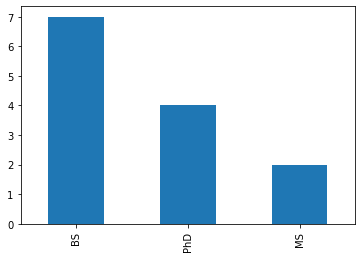

In [35]:
degree_counts.plot(kind='bar')

## Job Market

In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re

df = pd.read_csv("job-market.csv")
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
5,37404307.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
6,37404355.0,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0.0,30.0,NaN
7,37404350.0,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0.0,30.0,NaN
8,37404301.0,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0.0,30.0,NaN
9,37404286.0,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0.0,30.0,NaN


In [44]:
df.dtypes

Id                   float64
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary         float64
HighestSalary        float64
JobType               object
dtype: object

In [72]:
df.isnull().sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
dtype: int64

In [46]:
df = df.dropna()
df.isnull().sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
dtype: int64

In [48]:
df['Id'] = df['Id'].astype(int)
df.dtypes

Id                     int32
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary         float64
HighestSalary        float64
JobType               object
dtype: object

In [49]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
121,37404238,Fabricator/Installer,WORKPLACE ACCESS & SAFETY,2018-10-07 00:00:00+00:00,Melbourne,Bayside & South Eastern Suburbs,Trades & Services,Welders & Boilermakers,Trade qualified person with skills in welding ...,<p>&nbsp;</p>\n <p><strong><em>*&nbsp; ...,0.0,30.0,Full Time
122,37404195,Boilermaker,RPM Contracting QLD P/l,2018-10-07 00:00:00+00:00,Brisbane,Southern Suburbs & Logan,Trades & Services,Welders & Boilermakers,Perm rate $30. Structural steel fab & weld out...,<p>One of Australia's best engineering worksho...,0.0,30.0,Full Time
125,37404288,Casual Childcare Positions | Bondi Junction,anzuk Education,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Education & Training,Teaching - Early Childhood,"anzuk education are searching for reliable, en...","<p style=""text-align:center;""><strong>What is ...",0.0,30.0,Contract/Temp
126,37404267,Technician,Zoom Recruitment & Training,2018-10-07 00:00:00+00:00,Sydney,South West & M5 Corridor,Engineering,Mechanical Engineering,"This Australian Icon, connects the people of t...","<p>This Australian Icon, connects the people o...",0.0,30.0,Full Time
127,37404230,Systems Engineer,Humanised Group,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,<strong>The Company</strong><br> <br> This org...,0.0,30.0,Full Time


In [53]:
# df['FullDescription'] = df['FullDescription'].str.replace('\<(.*?)\>', '')
df['FullDescription'] = df['FullDescription'].str.replace('\&(.*?)\;', '')
df['FullDescription'] = df['FullDescription'].str.replace('<[^<]+?>', '')
# df['FullDescription'] = re.sub('<[^<]+?>', "", df['FullDescription'])
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
121,37404238,Fabricator/Installer,WORKPLACE ACCESS & SAFETY,2018-10-07 00:00:00+00:00,Melbourne,Bayside & South Eastern Suburbs,Trades & Services,Welders & Boilermakers,Trade qualified person with skills in welding ...,\n * Secure long term role with genuine...,0.0,30.0,Full Time
122,37404195,Boilermaker,RPM Contracting QLD P/l,2018-10-07 00:00:00+00:00,Brisbane,Southern Suburbs & Logan,Trades & Services,Welders & Boilermakers,Perm rate $30. Structural steel fab & weld out...,One of Australia's best engineering workshops ...,0.0,30.0,Full Time
125,37404288,Casual Childcare Positions | Bondi Junction,anzuk Education,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Education & Training,Teaching - Early Childhood,"anzuk education are searching for reliable, en...",What is anzuk? anzuk Early Childhoodis a rec...,0.0,30.0,Contract/Temp
126,37404267,Technician,Zoom Recruitment & Training,2018-10-07 00:00:00+00:00,Sydney,South West & M5 Corridor,Engineering,Mechanical Engineering,"This Australian Icon, connects the people of t...","This Australian Icon, connects the people of t...",0.0,30.0,Full Time
127,37404230,Systems Engineer,Humanised Group,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,The Company This organisation is well-establi...,0.0,30.0,Full Time
129,37404237,SENIOR MARKETING & PRODUCT MANAGER,Credit Repair Australia Pty Ltd,2018-10-07 00:00:00+00:00,Sydney,South West & M5 Corridor,Marketing & Communications,Product Management & Development,Seeking a forward thinker who is looking for a...,About us \n With more than 15 years exp...,0.0,30.0,Full Time
130,37404370,Operations Delivery Manager,Woolworths Group,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Programme & Project Management,Ready for a challenge? Opportunity to be a par...,\n \n \n \n \n ...,0.0,30.0,Full Time
131,37404228,General Manager,Multiple Sclerosis SA and NT Inc,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",CEO & General Management,General/Business Unit Manager,3-year contract Based in Adelaide Key leadersh...,"About us\n Multiple Solutions, an initi...",0.0,30.0,Full Time
132,37404226,General Manager,Multiple Sclerosis SA and NT Inc,2018-10-07 00:00:00+00:00,Melbourne,CBD & Inner Suburbs,CEO & General Management,General/Business Unit Manager,3-year contract Based in Adelaide Key leader...,"About us\n Multiple Solutions, an initi...",0.0,30.0,Full Time
133,37404174,Technical Support Executive - $70K + Super - C...,Command Group,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Do you have strong technical support skills? L...,\n \n Great small team env...,0.0,30.0,Full Time


In [55]:
df[df.duplicated()].shape[0]

0

## Principal Component Analysis (PCA)

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA

In [58]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url,header=None)

y = data[4] # Split off classifications
x = data.iloc[:,0:4] # Split off features

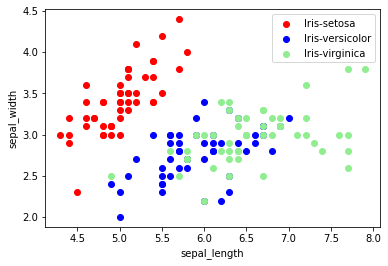

In [59]:
# Three different scatter series so the class labels in the legend are distinct
plt.scatter(x[y=='Iris-setosa'].iloc[:,0], x[y=='Iris-setosa'].iloc[:,1], label='Iris-setosa', c='red')
plt.scatter(x[y=='Iris-versicolor'].iloc[:,0], x[y=='Iris-versicolor'].iloc[:,1], label='Iris-versicolor', c='blue')
plt.scatter(x[y=='Iris-virginica'].iloc[:,0], x[y=='Iris-virginica'].iloc[:,1], label='Iris-virginica', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#display
plt.show()

In [60]:
# Rescale the data to a [0,1] range
x_norm = (x - x.min())/(x.max() - x.min())

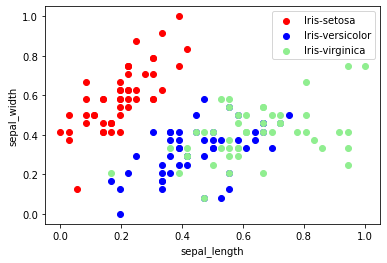

In [61]:
# Three different scatter series so the class labels in the legend are distinct
plt.scatter(x_norm[y=='Iris-setosa'].iloc[:,0], x_norm[y=='Iris-setosa'].iloc[:,1], label='Iris-setosa', c='red')
plt.scatter(x_norm[y=='Iris-versicolor'].iloc[:,0], x_norm[y=='Iris-versicolor'].iloc[:,1], label='Iris-versicolor', c='blue')
plt.scatter(x_norm[y=='Iris-virginica'].iloc[:,0], x_norm[y=='Iris-virginica'].iloc[:,1], label='Iris-virginica', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#display
plt.show()

In [70]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(x_norm))

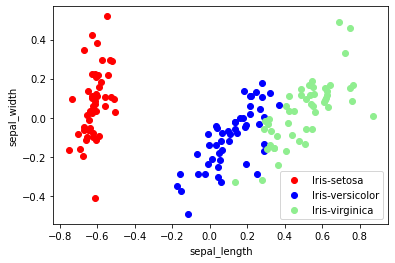

In [71]:
# Three different scatter series so the class labels in the legend are distinct
plt.scatter(transformed[y=='Iris-setosa'].iloc[:,0], transformed[y=='Iris-setosa'].iloc[:,1], label='Iris-setosa', c='red')
plt.scatter(transformed[y=='Iris-versicolor'].iloc[:,0], transformed[y=='Iris-versicolor'].iloc[:,1], label='Iris-versicolor', c='blue')
plt.scatter(transformed[y=='Iris-virginica'].iloc[:,0], transformed[y=='Iris-virginica'].iloc[:,1], label='Iris-virginica', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#display
plt.show()

## Wine Data

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("wine.data.csv")
label = df['Label']
df = df.drop('Label', 1)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


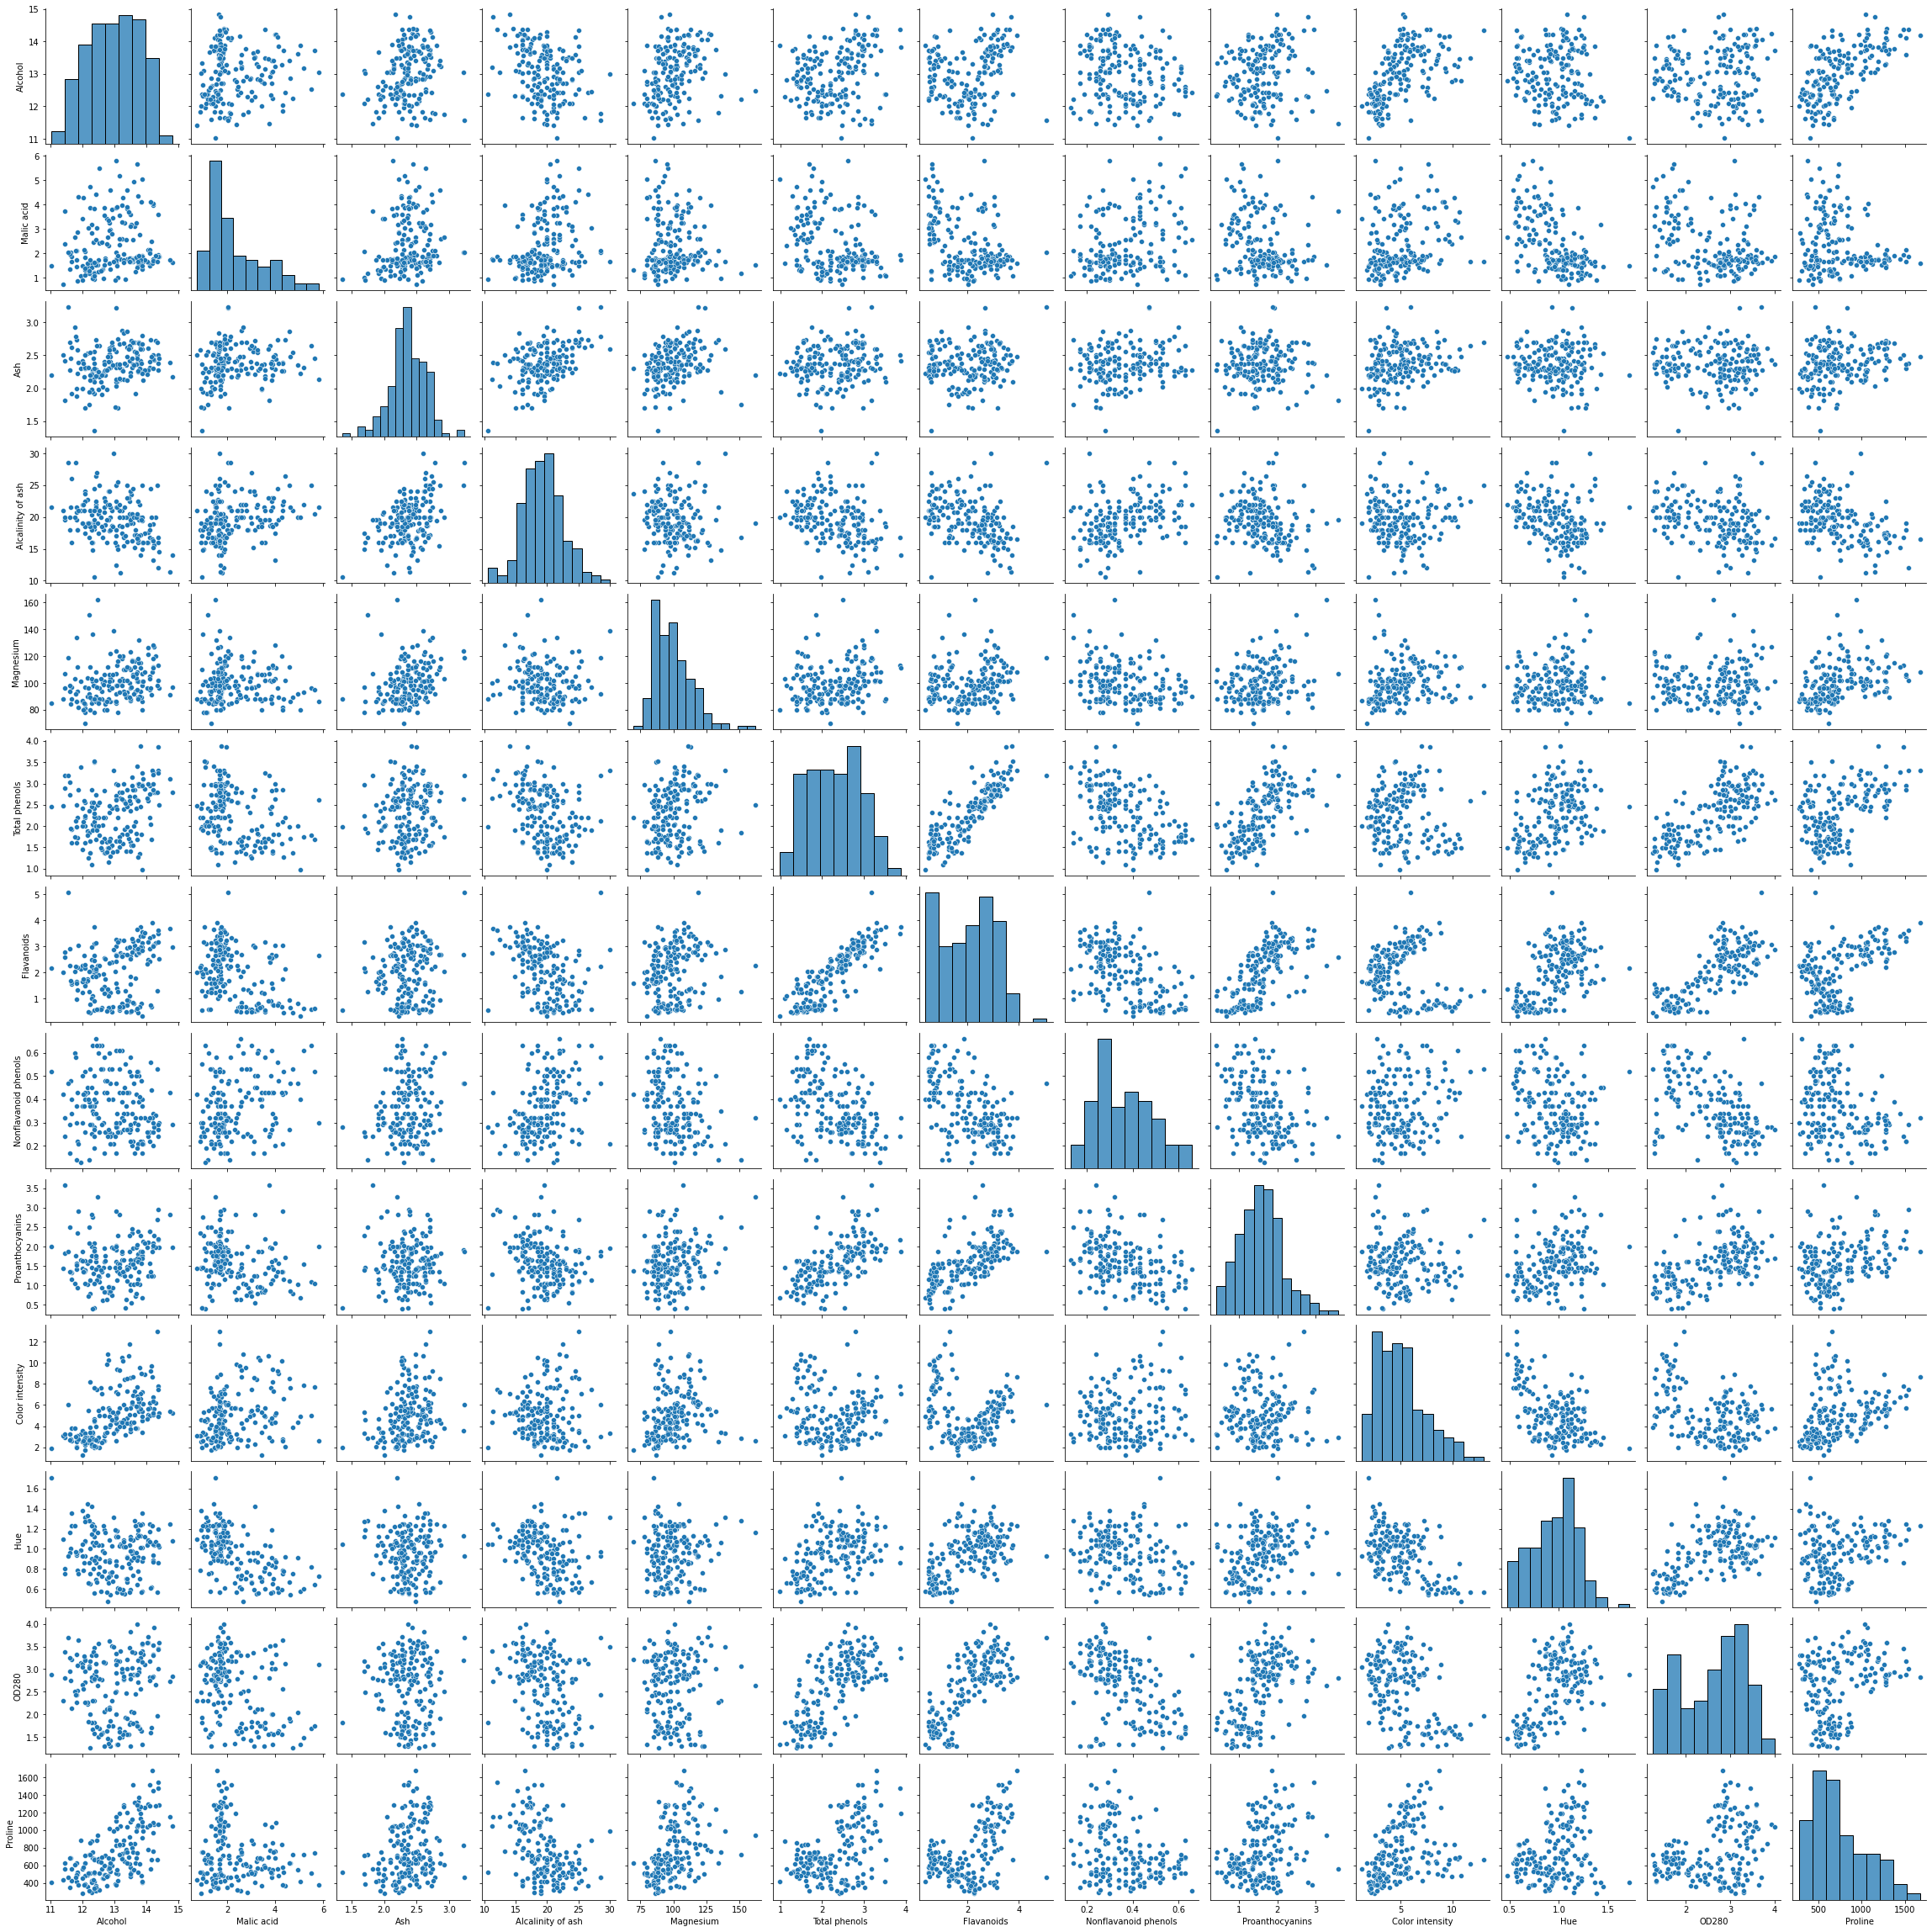

In [83]:
sns.pairplot(df)

### Conclusions?

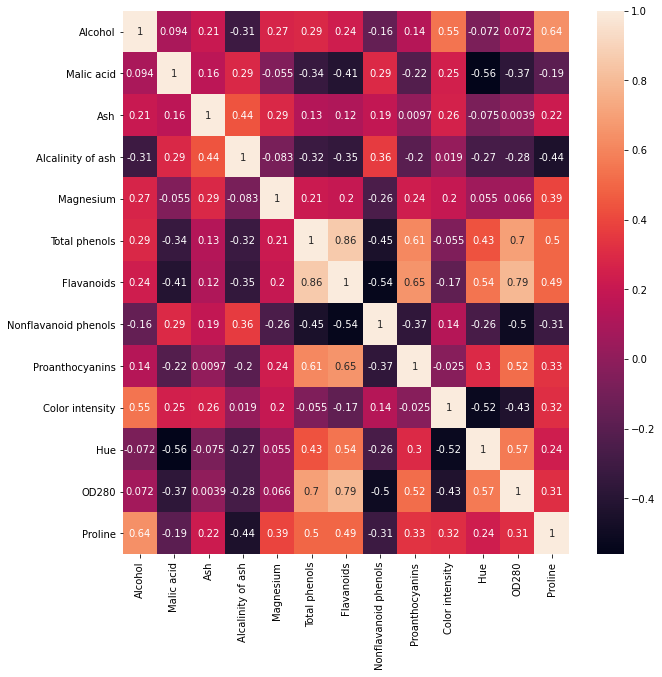

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), color = "k", annot=True)

### Pairs with high correlation: (Flavanoids, Total phenois), (Flavanoids, OD280)

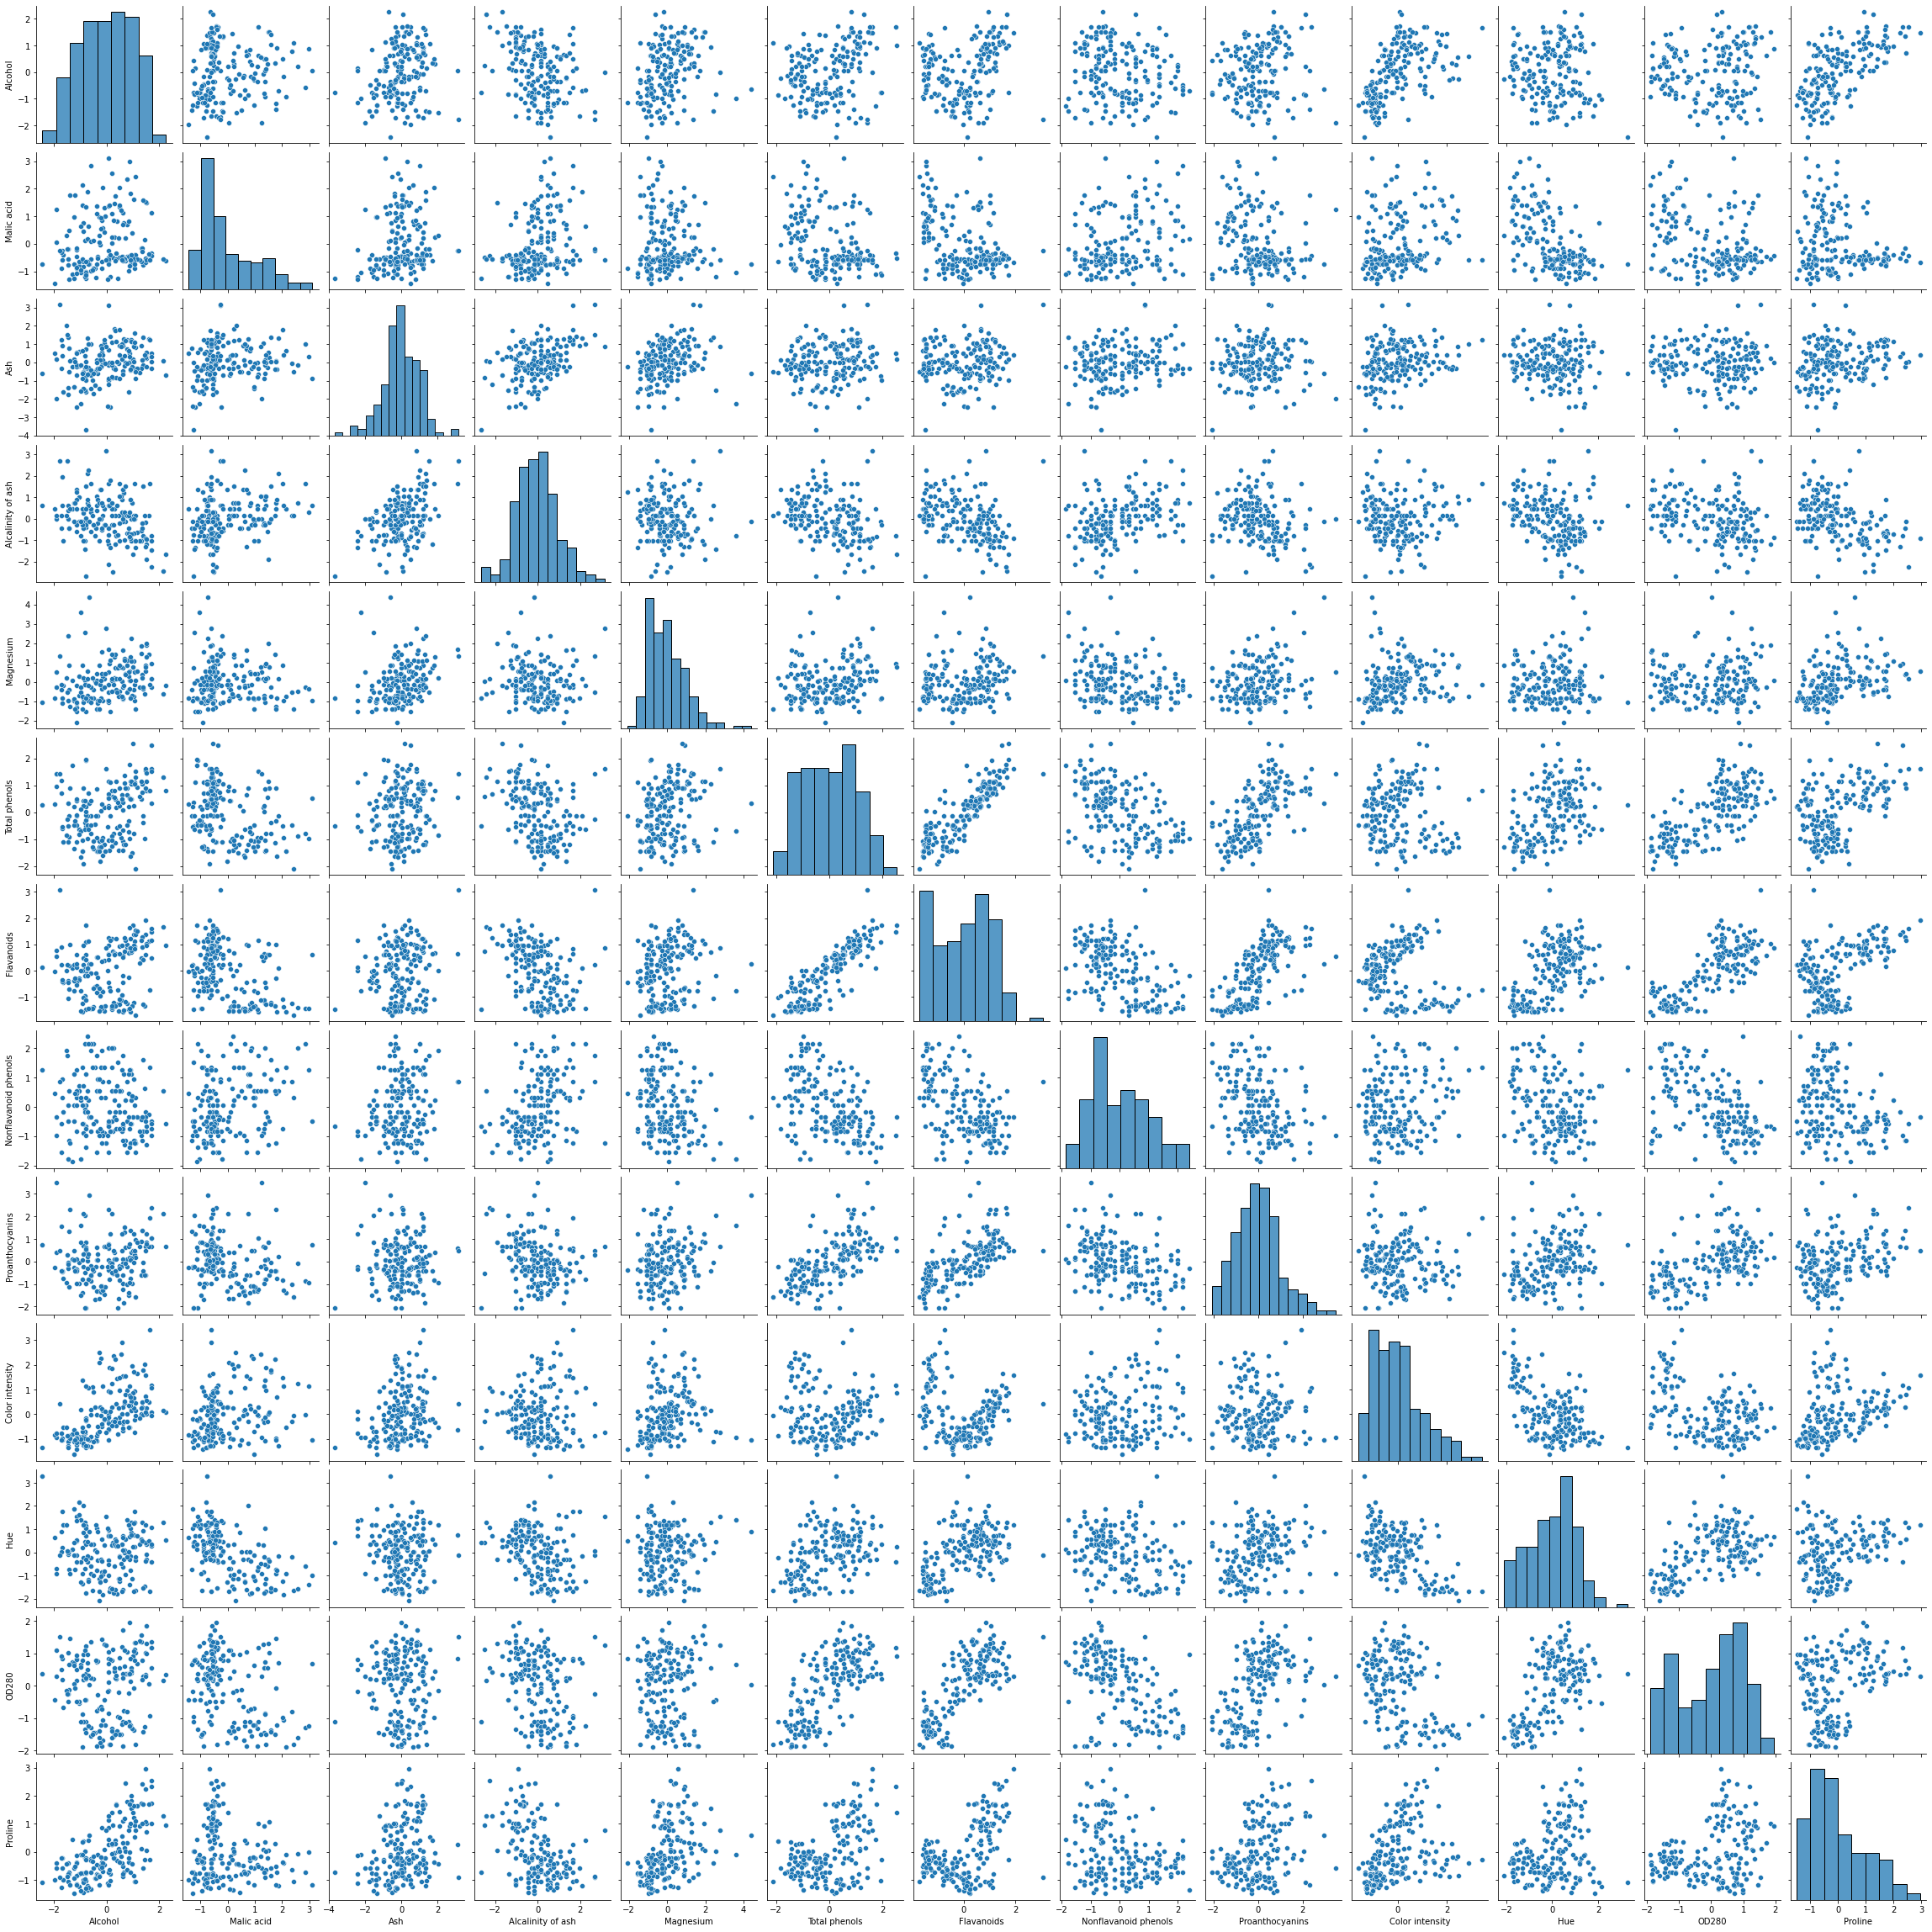

In [94]:
scaler = StandardScaler()
scaler.fit(df)
X_scaled_array = scaler.transform(df)
normalizedData = pd.DataFrame(X_scaled_array, columns = df.columns)
sns.pairplot(normalizedData)